In [14]:
# import packages
import sys
import os
from dotenv import load_dotenv
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt
import folium
import pandas as pd
import geopandas as gpd

# Load environment variables from .env file
load_dotenv()

# import the API builder
sys.path.append(os.path.abspath("../../"))
from scoutmaster.api import ScoutMasterAPI

In [15]:
# Scoutmaster API - Credentials
client_id = os.getenv('SM_CLIENT_ID')
client_secret = os.getenv('SM_CLIENT_SECRET')
dev = os.getenv('DEV')

# Scoutmaster API - Init
SM_API = ScoutMasterAPI(dev)
SM_API.authenticate(client_id=client_id, client_secret=client_secret)

✅ Successfully authenticated ScoutMaster API
HOST: https://dev-api.scoutmaster.nl/v2/


In [16]:
df_projects = SM_API.projects()
df_projects

,id,name,abbreviation,logo_path
0,8574cc2c-857e-477d-8a7d-e14e047adb5e,,,None
1,6d3359ee-2988-4b23-b35b-14391e0eaa5f,04/06/2025 project,PR,None
2,c52cc8b0-fd2e-4d7b-bc73-9623f8f212ae,Abaco project,AB,None
3,db21b65c-88b0-401f-b7e2-700737e1717a,ChicoGrow project,CH,None
4,282201d8-406a-46f3-91cf-9c5b4031556f,New Project,NP,None
5,227ca66e-3108-4bd2-9b7e-8732c68e90ad,retew,RE,None
6,7916f2f2-aa82-4daf-9db4-16b86386bbfd,sadsa,SA,None
7,13a991ec-2a2c-4cae-878d-df32ce11c54c,sadsasdasda,SA,None
8,48ba0c44-7c95-4fe2-8971-dd04ecfeda73,sadsdsadasda,SA,None
9,ff9548db-3e82-4f59-9995-fdfb010ebb57,SQAT,Sq,None


In [17]:
project = df_projects.iloc[13]
project_id = project["id"]
print(project)


id                           5f88d0d3-e4fc-482d-8981-b3532fa7e2c7
name                                                 Test Project
abbreviation                                                   TE
logo_path       https://bioscope-products.s3.eu-central-1.amaz...
Name: 13, dtype: object


In [18]:
df_fields = SM_API.fields(project_id)
field = df_fields.iloc[0]
field_id = field["id"]

{'output': 'geojson'}
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[4.57549667, 51.58900725], [4.57435942, 51.58943386], [4.57426822, 51.58945719], [4.57428446, 51.58949512], [4.57487396, 51.59010122], [4.575445, 51.59068571], [4.57664187, 51.59190862], [4.57674372, 51.59201086], [4.57687035, 51.59174289], [4.57710088, 51.5912525], [4.57716987, 51.59117347], [4.57724694, 51.59110844], [4.57751072, 51.59093761], [4.57749517, 51.59091839], [4.57698386, 51.59037508], [4.57646568, 51.58981891], [4.57579688, 51.5891293], [4.57563615, 51.58896726], [4.57549667, 51.58900725]]]}, 'properties': {'id': '39507fbd-6f0e-49e5-bdb2-f36d964cffa1', 'name': 'bieten rombouts 25', 'address': {'road': 'Brede Balrouw', 'state': 'Noord-Brabant', 'hamlet': 'Kruisstraat', 'country': 'Nederland', 'village': 'Hoeven', 'postcode': '4741 RN', 'country_code': 'nl', 'municipality': 'Halderberge', 'ISO3166-2-lvl4': 'NL-NB'}, 'area_ha': 3.13, 'created_at': '2025-07-30T13:42:43.496+00:00', 'dele

<Axes: >

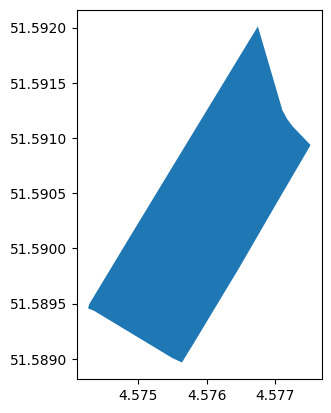

In [19]:
SM_API.output_format = "gdf"
gdf_field = SM_API.field_by_id(field_id)
gdf_field.plot()